# Project -- SVMs

In [1]:
# Imports:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import fbeta_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# 1) Load the training and validation CSV files into four separate Pandas objects to hold labels and features for training, and labels and features for validation. 
# Fit a standardizer or normalizer on the training data and using to transform the training and validation features.

# Sample data for better memory and efficiency in otuputs
train = pd.read_csv('Training.csv').sample(n=10000, random_state = 42)
val = pd.read_csv('Validation.csv').sample(n=10000, random_state = 42)

train_label = np.array(train['Condition'])
train_features = np.array(train.drop('Condition', axis=1))

val_label = np.array(val['Condition'])
val_features = np.array(val.drop('Condition', axis=1))

scaler = StandardScaler()
scaler.fit(train_features)
train_scaled = scaler.fit_transform(train_features)
val_scaled = scaler.transform(val_features)

  DataFrame List  Train Metric  Validation Metric
0            ovo      0.721584           0.699261
1            ovr      0.721584           0.699261


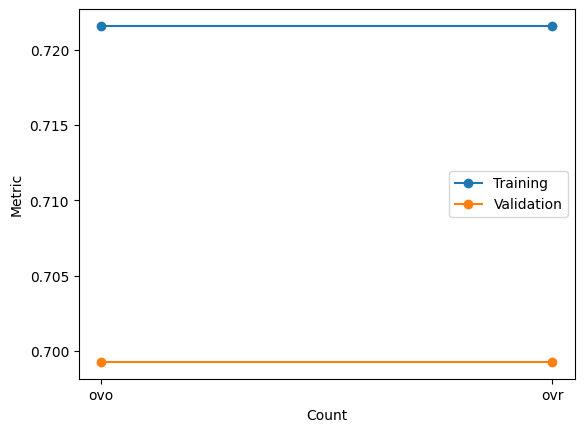

In [3]:
# 2) Train two SVM models, one for each choice of decision_function_shape; use default choices for the other hyperparameters.
# Choose a metric (e.g. accuracy, precision, 𝐹1 score, etc.) to evaluate model performance.
# Create a list: ‘dfs_list = [‘ovo’, ‘ovr’]’.
# Create empty lists named similarly to ‘train_dfs_metric’ and ‘val_dfs_metric’ to hold values of the metric.
# For i in dfs_list:
#   · Train a model with decision_function_shape = i.
#   · Find predictions on the training and validation sets.
#   · Calculate the chosen metric on training and validation sets. Append the values to their lists.
# Create and display a dataframe with dfs_list, train_dfs_metric, and val_dfs_metric as columns. Label the columns.
# Plot the training and validation metric for each model. 
# Add a markdown cell to justify a best choice of decision_function_shape. 
# You may need to consider training time in addition to the metric values, if training is too slow for one of the options.

dfs_list = ['ovo', 'ovr']
train_dfs_metric = []
val_dfs_metric = []

for i in dfs_list:
    svm = SVC(decision_function_shape = i)
    svm.fit(train_scaled, train_label)
    train_pred = svm.predict(train_scaled)
    val_pred = svm.predict(val_scaled)
    train_dfs_metric.append(fbeta_score(train_label, train_pred, beta=2))
    val_dfs_metric.append(fbeta_score(val_label, val_pred, beta=2))

df = pd.DataFrame({
    'DataFrame List': dfs_list,
    'Train Metric': train_dfs_metric,
    'Validation Metric': val_dfs_metric
})

print(df)

plt.plot(df['DataFrame List'], df['Train Metric'], label='Training', marker='o')
plt.plot(df['DataFrame List'], df['Validation Metric'], label='Validation', marker='o')
plt.xlabel('Count')
plt.ylabel('Metric')
plt.legend()
plt.show()

**Explanation:**

Both hyperparameters output the same results, this indicates that the different classes have the same amount of samples, providing the same training and validation metrics.
With this in mind, either model/hyperparameter value could be used for further analysis/model development.

In [4]:
# Explanation:

# Both hyperparameters output the same results, this indicates that the different classes have the same amount of samples, providing the same training and validation metrics. 
# With this in mind, either model/hyperparameter value could be used for further analysis/model development.

   DataFrame List  Train Metric  Validation Metric
0               1      0.721584           0.699261
1              10      0.721584           0.699261
2             100      0.721584           0.699261
3            1000      0.721584           0.699261
4           10000      0.721584           0.699261


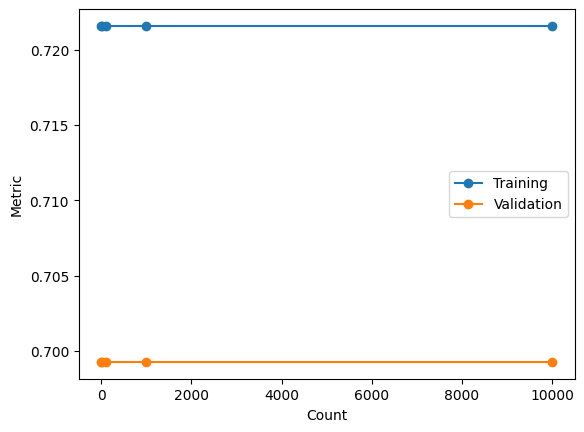

In [5]:
# 3) Experiment with the polynomial kernel.
# Choose five different degree values to try and record these in a list called ‘d_list’. Use the decision_function_shape you chose above, and default values for other hyperparameters.
# Create empty lists named similarly to ‘train_d_metric’ and ‘val_d_metric’ to hold values of the metric.
# For i in d_list:
#   · Train a model using degree=i.
#   · Find predictions on the training and validation sets.
#   · Calculate the chosen metric on training and validation sets. Append the values to their lists.
# Create and display a dataframe with d_list, train_d_metric, and val_d_metric as columns. Label the columns.
# Plot the training and validation metric for each model. Revisit the loop if you need to try other values of degree. 
# Add a markdown cell to explain your choice of best value of degree.

d_list = [1, 10, 100, 1000, 10000]
train_d_metric = []
val_d_metric = []

for i in d_list:
    svm = SVC(decision_function_shape = 'ovo', degree = i)
    svm.fit(train_scaled, train_label)
    train_pred = svm.predict(train_scaled)
    val_pred = svm.predict(val_scaled)
    train_d_metric.append(fbeta_score(train_label, train_pred, beta=2))
    val_d_metric.append(fbeta_score(val_label, val_pred, beta=2))

df = pd.DataFrame({
    'DataFrame List': d_list,
    'Train Metric': train_d_metric,
    'Validation Metric': val_d_metric
})

print(df)

plt.plot(df['DataFrame List'], df['Train Metric'], label='Training', marker='o')
plt.plot(df['DataFrame List'], df['Validation Metric'], label='Validation', marker='o')
plt.xlabel('Count')
plt.ylabel('Metric')
plt.legend()
plt.show()

**Explanation:**

As with the previous hyperparameter, each model produces the same metrics. I tried using smaller values (from 1 to 5), but the results were identical to the ones above. This indicates that the dataset is very nicely divided, which is ideal for any dataset, as results would be unbiased.

In [6]:
# Explanation:

# As with the previous hyperparameter, each model produces the same metrics. I tried using smaller values (from 1 to 5), but the results were identical to the ones above. 
# This indicates that the dataset is very nicely divided, which is ideal for any dataset, as results would be unbiased.

   DataFrame List  Train Metric  Validation Metric
0         0.00001      0.837622           0.831548
1         0.00010      0.636039           0.618602
2         0.00100      0.667490           0.657867
3         0.01000      0.681542           0.680671
4         0.10000      0.729150           0.699433


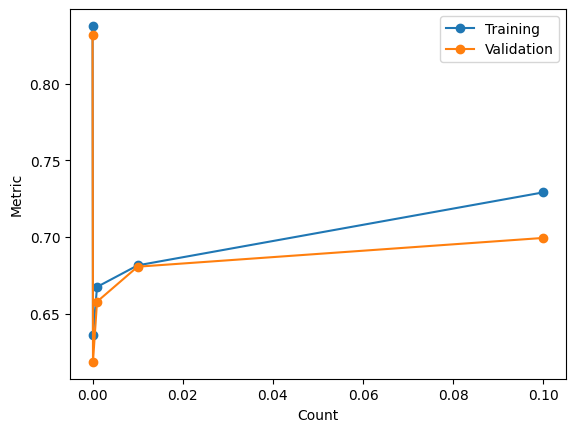

In [7]:
# 4) Experiment with the ‘rbf’ kernel.
# Choose five different gamma values to try and record these in a list called ‘g_list’. Use the decision_function_shape you chose above, and default values for other hyperparameters.
# Create empty lists named similarly to ‘train_g_metric’ and ‘val_g_metric’ to hold values of the metric.
# For i in g_list:
#   · Train a model using degree=i.
#   · Find predictions on the training and validation sets.
#   · Calculate the chosen metric on training and validation sets. Append the values to their lists.
# Create and display a dataframe with g_list, train_g_metric, and val_g_metric as columns. Label the columns.
# Plot the training and validation metric for each model. Revisit the loop if you need to try other values of gamma. 
# Add a markdown cell to explain your choice of best value.

g_list = [0.00001, 0.0001, 0.001, 0.01, 0.1]
train_g_metric = []
val_g_metric = []

for i in g_list:
    svm = SVC(decision_function_shape = 'ovo', degree = 1, gamma = i)
    svm.fit(train_scaled, train_label)
    train_pred = svm.predict(train_scaled)
    val_pred = svm.predict(val_scaled)
    train_g_metric.append(fbeta_score(train_label, train_pred, beta=2))
    val_g_metric.append(fbeta_score(val_label, val_pred, beta=2))

df = pd.DataFrame({
    'DataFrame List': g_list,
    'Train Metric': train_g_metric,
    'Validation Metric': val_g_metric
})

print(df)

plt.plot(df['DataFrame List'], df['Train Metric'], label='Training', marker='o')
plt.plot(df['DataFrame List'], df['Validation Metric'], label='Validation', marker='o')
plt.xlabel('Count')
plt.ylabel('Metric')
plt.legend()
plt.show()

**Explanation:**

**gamma [0.1, 1, 10, 100, 1000]:**
<pre>
   DataFrame List  Train Metric  Validation Metric
0             0.1      0.685258           0.638717
1             1.0      0.811754           0.630220
2            10.0      0.998870           0.726291
3           100.0      1.000000           0.003475
4          1000.0      1.000000           0.000000
</pre>

**gamma [0.00001, 0.0001, 0.001, 0.01, 0.1]:**
<pre>
   DataFrame List  Train Metric  Validation Metric
0         0.00001      0.837622           0.831548
1         0.00010      0.636039           0.618602
2         0.00100      0.667490           0.657867
3         0.01000      0.681542           0.680671
4         0.10000      0.729150           0.699433
</pre>

Based on the metrics provided using the different values I tested, I believe that the best model is the one with the value 0.00001. With most of the other values, most were underfitting (mostly the smaller values), and some were overfitting (mostly the higher values like 1000 or 100). These most likely resulted because the model was over training on the training data, which led to overfitting and high values in the training metric, while low values in the validation metric; and under training on the training data resulting in underfitting and low values in both training and validation metrics.

I chose the model with the value 0.00001 because it is relatively high (as needed when testing with metrics), and almost identical training and validation metric values. When deciding whether a model is suitable, you look for the model with the ideal value for the condition you are testing (such as low - but not too low - for errors, or high - but not high - for metrics like F2-score in this case), and you are looking for points that are somewhat identical. With this model, I believe that it fits both conditions very well, which makes it the best model.

In [8]:
# Explanation:

# gamma [0.1, 1, 10, 100, 1000]:
#    DataFrame List  Train Metric  Validation Metric
# 0             0.1      0.685258           0.638717
# 1             1.0      0.811754           0.630220
# 2            10.0      0.998870           0.726291
# 3           100.0      1.000000           0.003475
# 4          1000.0      1.000000           0.000000

# gamma [0.00001, 0.0001, 0.001, 0.01, 0.1]:
#    DataFrame List  Train Metric  Validation Metric
# 0         0.00001      0.837622           0.831548
# 1         0.00010      0.636039           0.618602
# 2         0.00100      0.667490           0.657867
# 3         0.01000      0.681542           0.680671
# 4         0.10000      0.729150           0.699433

# Based on the metrics provided using the different values I tested, I believe that the best model is the one with the value 0.00001. With most of the other values, 
# most were underfitting (mostly the smaller values), and some were overfitting (mostly the higher values like 1000 or 100). These most likely resulted because the model 
# was over training on the training data, which led to overfitting and high values in the training metric, while low values in the validation metric; and under training on 
# the training data resulting in underfitting and low values in both training and validation metrics.

# I chose the model with the value 0.00001 because it is relatively high (as needed when testing with metrics), and almost identical training and validation metric values. 
# When deciding whether a model is suitable, you look for the model with the ideal value for the condition you are testing (such as low - but not too low - for errors, 
# or high - but not high - for metrics like F2-score in this case), and you are looking for points that are somewhat identical. With this model, I believe that it fits both 
# conditions very well, which makes it the best model.

   DataFrame List  Train Metric  Validation Metric
0             7.1      0.700863           0.698872
1             7.2      0.701180           0.699048
2             7.3      0.702275           0.700078
3             7.4      0.702765           0.700197
4             7.5      0.702680           0.700873
5             7.6      0.703369           0.701316
6             7.7      0.703398           0.701668
7             7.8      0.703310           0.701959
8             7.9      0.703426           0.702049


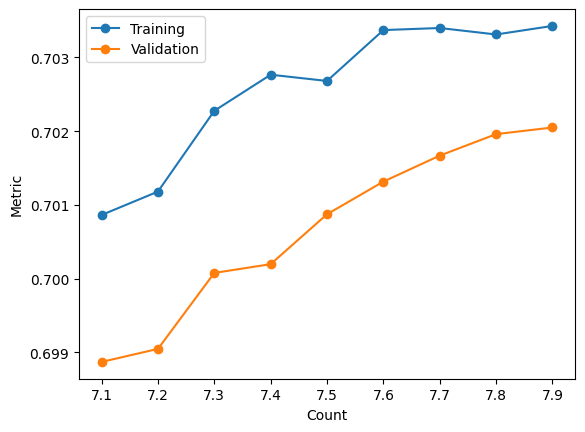

In [9]:
# 5) Experiment with the ‘C’ hyperparameter.
# Choose five different C values to try and record these in a list called ‘C_list’. Use the decision_function_shape, kernel, and degree or gamma you chose above, 
# and default values for other hyperparameters.
# Create empty lists named similarly to ‘train_C_metric’ and ‘val_C_metric’ to hold values of the metric.
# For i in C_list:
#   · Train a model using C=i.
#   · Find predictions on the training and validation sets.
#   · Calculate the chosen metric on training and validation sets. Append the values to their lists.
# Create and display a dataframe with C_list, train_C_metric, and val_C_metric as columns. Label the columns.
# Plot the training and validation metric for each model. Revisit the loop if you need to try other values of C. 
# Add a markdown cell to explain your choice for best value of C.

#Tried testing all values between 7 and 8 to find the right one
C_list = [7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9]
train_C_metric = []
val_C_metric = []

for i in C_list:
    svm = SVC(decision_function_shape = 'ovo', degree = 1, gamma = 0.01, C = i)
    svm.fit(train_scaled, train_label)
    train_pred = svm.predict(train_scaled)
    val_pred = svm.predict(val_scaled)
    train_C_metric.append(fbeta_score(train_label, train_pred, beta=2))
    val_C_metric.append(fbeta_score(val_label, val_pred, beta=2))

df = pd.DataFrame({
    'DataFrame List': C_list,
    'Train Metric': train_C_metric,
    'Validation Metric': val_C_metric
})

print(df)

plt.plot(df['DataFrame List'], df['Train Metric'], label='Training', marker='o')
plt.plot(df['DataFrame List'], df['Validation Metric'], label='Validation', marker='o')
plt.xlabel('Count')
plt.ylabel('Metric')
plt.legend()
plt.show()

**Explanation:**

**C[0.1, 1, 5, 10, 50]:**
<pre>
   DataFrame List  Train Metric  Validation Metric
0             0.1      0.671168           0.664054
1             1.0      0.681542           0.680671
2             5.0      0.697282           0.694427
3            10.0      0.704175           0.702229
4            50.0      0.715428           0.702489
</pre>

**C[5, 6, 7, 8, 9]:**
<pre>
   DataFrame List  Train Metric  Validation Metric
0               5      0.697282           0.694427
1               6      0.698240           0.696294
2               7      0.700891           0.698753
3               8      0.703542           0.701992
4               9      0.704807           0.702994
</pre>

**C[7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9]:**
<pre>
   DataFrame List  Train Metric  Validation Metric
0             7.1      0.700863           0.698872
1             7.2      0.701180           0.699048
2             7.3      0.702275           0.700078
3             7.4      0.702765           0.700197
4             7.5      0.702680           0.700873
5             7.6      0.703369           0.701316
6             7.7      0.703398           0.701668
7             7.8      0.703310           0.701959
8             7.9      0.703426           0.702049
</pre>

From the first output displayed, I noticed relatively good metrics for the value 10, so I decided to expand on that which shows the next output above. With the new data provided, I noticed that the best metrics shifted to the value between 7 and 8. This became best because this new value is relatively close for both training and validation metrics, while also prioritizing a high value for the F2-score, and simultaneously prioritizing the validation metrics (because with high training, but low validation, that indicates that the model is overfitting the data, in that it is over learning the training data, and as such, producing a lower validation metric). So, after getting the second outputted results above, I decided to see if I could obtain better results (as seen with the thrid, and last, outputs). With this new dataframe above, I found that the metrics under the value 7.9 are now best.

In conclusion, I found that the best model is the one with the value 7.9. It prioritizes the training data, while also not over or underfitting it, resulting in a very close validation metric (which is ideal).

In [10]:
# Explanation:

# C[0.1, 1, 5, 10, 50]:
#    DataFrame List  Train Metric  Validation Metric
# 0             0.1      0.671168           0.664054
# 1             1.0      0.681542           0.680671
# 2             5.0      0.697282           0.694427
# 3            10.0      0.704175           0.702229
# 4            50.0      0.715428           0.702489

# C[5, 6, 7, 8, 9]:
#    DataFrame List  Train Metric  Validation Metric
# 0               5      0.697282           0.694427
# 1               6      0.698240           0.696294
# 2               7      0.700891           0.698753
# 3               8      0.703542           0.701992
# 4               9      0.704807           0.702994

# C[7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9]:
#    DataFrame List  Train Metric  Validation Metric
# 0             7.1      0.700863           0.698872
# 1             7.2      0.701180           0.699048
# 2             7.3      0.702275           0.700078
# 3             7.4      0.702765           0.700197
# 4             7.5      0.702680           0.700873
# 5             7.6      0.703369           0.701316
# 6             7.7      0.703398           0.701668
# 7             7.8      0.703310           0.701959
# 8             7.9      0.703426           0.702049

# From the first output displayed, I noticed relatively good metrics for the value 10, so I decided to expand on that which shows the next output above. With the new data provided, I noticed 
# that the best metrics shifted to the value between 7 and 8. This became best because this new value is relatively close for both training and validation metrics, while also prioritizing a 
# high value for the F2-score, and simultaneously prioritizing the validation metrics (because with high training, but low validation, that indicates that the model is overfitting the data, 
# in that it is over learning the training data, and as such, producing a lower validation metric). So, after getting the second outputted results above, I decided to see if I could obtain better 
# results (as seen with the thrid, and last, outputs). With this new dataframe above, I found that the metrics under the value 7.9 are now best.

# In conclusion, I found that the best model is the one with the value 7.9. It prioritizes the training data, while also not over or underfitting it, 
# resulting in a very close validation metric (which is ideal).

In [11]:
# 6) Train a model using the values you found above for decision_function_shape, kernel, degree or gamma, and C. Find predictions for both the training and validation sets. 
# Then for both training and validation:
# Use the classification_report and other functions in sklearn to display the metrics you decided upon in the project step ‘data analysis and preparation.’
# Use the confusion_matrix function in sklearn to display the confusion matrix.

svm = SVC(decision_function_shape = 'ovo', degree = 1, gamma = 0.00001, C = 7.9)
svm.fit(train_scaled, train_label)

train_pred = svm.predict(train_scaled)
val_pred = svm.predict(val_scaled)


train_class_report = classification_report(train_label, train_pred)
val_class_report = classification_report(val_label, val_pred)

# Need to calculate F2-score separately
train_f2 = fbeta_score(train_label, train_pred, beta=2)
val_f2 = fbeta_score(val_label, val_pred, beta=2)

print('Training Classification Report:')
print(train_class_report)
print('Training F2-Score: ', train_f2)
print('Validation Classification Report:')
print(val_class_report)
print('Validation F2-Score: ', val_f2)

train_matrix = confusion_matrix(train_label, train_pred)
val_matrix = confusion_matrix(val_label, val_pred)

print('Training Confusion Matrix:')
print(train_matrix)
print('Validation Confusion Matrix:')
print(val_matrix)

Training Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.76      0.70      4922
           1       0.73      0.61      0.66      5078

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000

Training F2-Score:  0.6267817870815345
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.79      0.72      5032
           1       0.73      0.59      0.65      4968

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.68     10000
weighted avg       0.69      0.69      0.68     10000

Validation F2-Score:  0.609725424439321
Training Confusion Matrix:
[[3758 1164]
 [2000 3078]]
Validation Confusion Matrix:
[[3958 1074]
 [2059 2909]]


In [12]:
# 7) Add a markdown cell to discuss how well the model in step 6 performs. Observe any problems that need to be addressed, such as too many false positives or 
# false negatives for a particular class, low metrics (underfitting) across both training and validation, overfitting, etc.

**Explanation:**

The model performs reasonably well based on the above metrics and confusion matrices. Although the performance is good, there are still many areas for improvement:

1. **Accuracy** is 68% for training and 69% for validation. The close values for accuracy suggest that the model is not over or underfitting.
2. The **F2-Score** is 0.627 and 0.61 for training and validation, respectively, and while these values reflect a good balance of precision and recall, they are quite low, which is an area for improvement.
3. The **classification reports** show that the model performs better in the negative class 0 (with high precision 66-65% and recall 79-76%), than in the positive (lower precision 73% and recall 61-59%). These lower values are especially bad for a medical classification problem, or any model in general, because the positive class, when wrongly classified, leads to false negatives - which are bad for this use case.
4. The **confusion matrices** are relatively good, but there is still a lot of room for improvement. For example, the higher true positives and negatives are good qualities for any model, but the somewhat high false attributes, are a bit concerning. With 2,000 FNs in the training and 2,059 in the validation, this is concerning, and should be addressed. Given that false negatives are worse for this use case, it is not a good quality that there are a higher number of them in the validation matrix.

<pre>
False Positives (class 0 misclassified as class 1):
Training: 1,164 cases.    Validation: 1,074 cases.
False Negatives (class 1 misclassified as class 0):
Training: 2,000 cases.    Validation: 2,059 cases.
</pre>

In conclusion, while the model’s performance is relatively good and shows no signs of overfitting or underfitting, there is still room for improvement, particularly in reducing false negatives and improving metrics like recall and the F2-score.

In [14]:
# Explanation:

# The model performs reasonably well based on the above metrics and confusion matrices. Although the performance is good, there are still many areas for improvement:

# 1. Accuracy is 68% for training and 69% for validation. The close values for accuracy suggest that the model is not over or underfitting.
# 2. The F2-Score is 0.627 and 0.61 for training and validation, respectively, and while these values reflect a good balance of precision and recall, they are quite low, 
#     which is an area for improvement.
# 3. The classification reports show that the model performs better in the negative class 0 (with high precision 66-65% and recall 79-76%), than in the positive (lower precision 73% 
#     and recall 61-59%). These lower values are especially bad for a medical classification problem, or any model in general, because the positive class, when wrongly classified, 
#     leads to false negatives - which are bad for this use case.
# 4. The confusion matrices are relatively good, but there is still a lot of room for improvement. For example, the higher true positives and negatives are good qualities for any model, 
#     but the somewhat high false attributes, are a bit concerning. With 2,000 FNs in the training and 2,059 in the validation, this is concerning, and should addressed. Given that false 
#     negatives are worse for this use case, it is not a good quality that there are a higher number of them in the validation matrix.

# False Positives (class 0 misclassified as class 1):
# Training: 1,164 cases.    Validation: 1,074 cases.
# False Negatives (class 1 misclassified as class 0):
# Training: 2,000 cases.    Validation: 2,059 cases.

# In conclusion, while the model’s performance is relatively good and shows no signs of overfitting or underfitting, there is still room for improvement, 
# particularly in reducing false negatives and improving metrics like recall and the F2-score.